In [1]:
import torch
from transformers import DINOModel, DINOFeatureExtractor
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the DINO model and feature extractor
feature_extractor = DINOFeatureExtractor.from_pretrained("facebook/dino-vitb16")
model = DINOModel.from_pretrained("facebook/dino-vitb16")

def load_image(path):
    image = Image.open(path).convert("RGB")
    return image

# Replace with the path to your local image
image_path = r"C:\Users\sambi\Downloads\test.jpg"
image = load_image(image_path)

# Preprocess the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Pass the image through the model
with torch.no_grad():
    outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state  # Shape: [batch, num_patches + 1, hidden_dim]

# Extract the attention map
attention_scores = last_hidden_state[0, 1:].mean(dim=-1).reshape(14, 14).numpy()  # Reshape for 14x14 attention map

# Resize attention map to image size
attention_map = Image.fromarray((attention_scores * 255).astype(np.uint8)).resize(image.size, resample=Image.BILINEAR)
attention_map = np.array(attention_map)

# Plot original image and attention map
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].axis("off")
ax[0].set_title("Original Image")

ax[1].imshow(image)
ax[1].imshow(attention_map, cmap="jet", alpha=0.5)  # Overlay attention map
ax[1].axis("off")
ax[1].set_title("Attention Map Highlighting Humans")

plt.show()


C:\Users\sambi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'DINOModel' from 'transformers' (C:\Users\sambi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\__init__.py)

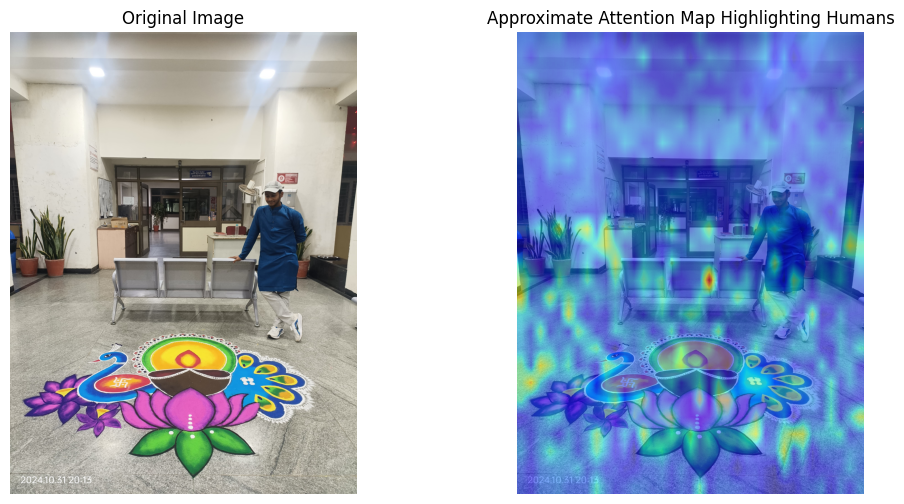

In [11]:
import torch
import torchvision.transforms as T
from torchvision.models import vit_b_16, ViT_B_16_Weights
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the model with weights
weights = ViT_B_16_Weights.IMAGENET1K_V1
model = vit_b_16(weights=weights)
model.eval()

# Image preprocessing
transform = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor(),
    T.Normalize(mean=weights.transforms().mean, std=weights.transforms().std)
])

# Load the image
image_path = r"C:\Users\sambi\Downloads\test.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Pass the image through the model
with torch.no_grad():
    outputs = model(input_tensor)
    embeddings = outputs[:, 1:]  # Exclude CLS token

# Reshape embeddings to 31x32 grid (approximate square grid for 999 patches)
embedding_size_x, embedding_size_y = 27,37
attention_map = embeddings[0].reshape(embedding_size_x, embedding_size_y).numpy()

# Normalize the attention map for visualization
attention_map = (attention_map - attention_map.min()) / (attention_map.max() - attention_map.min())
attention_map = Image.fromarray((attention_map * 255).astype(np.uint8)).resize(image.size, resample=Image.BILINEAR)

# Plot original image and attention map
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].axis("off")
ax[0].set_title("Original Image")

ax[1].imshow(image)
ax[1].imshow(np.array(attention_map), cmap="jet", alpha=0.5)  # Overlay attention map
ax[1].axis("off")
ax[1].set_title("Approximate Attention Map Highlighting Humans")

plt.show()


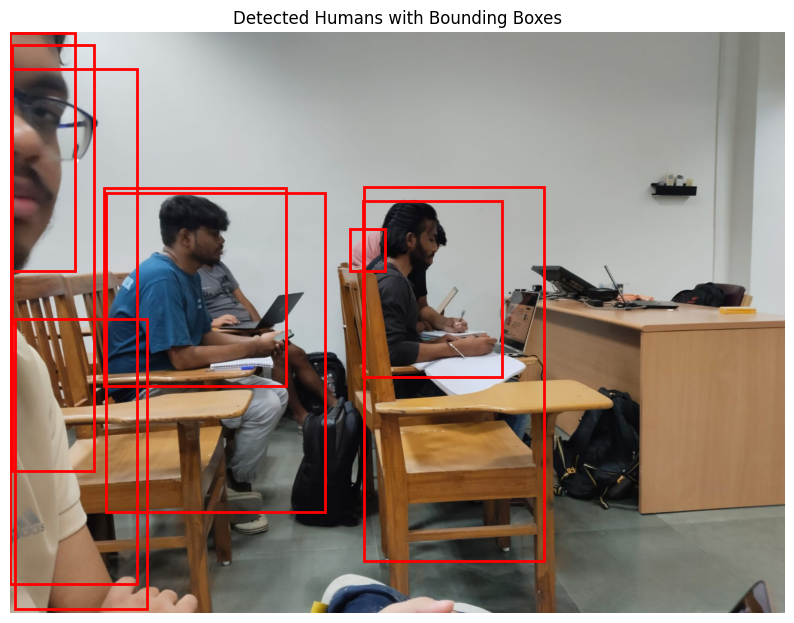

In [13]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Image preprocessing
transform = T.Compose([
    T.ToTensor(),
])

# Load the image
image_path = r"C:\Users\sambi\Downloads\test2.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Pass the image through the model
with torch.no_grad():
    predictions = model(input_tensor)

# Get bounding boxes, labels and scores
boxes = predictions[0]['boxes'].numpy()  # Bounding boxes
labels = predictions[0]['labels'].numpy()  # Object labels
scores = predictions[0]['scores'].numpy()  # Detection scores

# Filter for humans (label 1 corresponds to 'person' in COCO dataset)
human_boxes = boxes[labels == 1]
human_scores = scores[labels == 1]

# Set a threshold for scores
threshold = 0.5
filtered_boxes = human_boxes[human_scores > threshold]

# Convert to int for bounding box coordinates
filtered_boxes = filtered_boxes.astype(int)

# Plot the original image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

for box in filtered_boxes:
    x1, y1, x2, y2 = box
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

plt.axis("off")
plt.title("Detected Humans with Bounding Boxes")
plt.show()


In [14]:
scores

array([0.9972287 , 0.9901211 , 0.95213497, 0.9320804 , 0.9238136 ,
       0.9194204 , 0.91340715, 0.9123178 , 0.87871784, 0.83656275,
       0.8188154 , 0.817807  , 0.8157174 , 0.80989563, 0.7788786 ,
       0.751247  , 0.74629015, 0.7267943 , 0.7186847 , 0.70215   ,
       0.6326341 , 0.5683165 , 0.53407973, 0.46990174, 0.44496536,
       0.43681735, 0.40306875, 0.4007314 , 0.39915404, 0.38225663,
       0.3759005 , 0.35981256, 0.31825495, 0.28780636, 0.28470615,
       0.2715502 , 0.2470472 , 0.2430308 , 0.23257923, 0.21833713,
       0.21615182, 0.21089147, 0.20789148, 0.17476971, 0.17372714,
       0.14910465, 0.14794846, 0.1462371 , 0.14607851, 0.12887314,
       0.1234247 , 0.11660283, 0.11548027, 0.10858615, 0.10712918,
       0.10547239, 0.09878324, 0.09171376, 0.08694196, 0.08319779,
       0.08041266, 0.08009235, 0.07951977, 0.07663132, 0.07662871,
       0.07603154, 0.07591762, 0.07400113, 0.06918957, 0.06856591,
       0.06500621, 0.06477679, 0.05843773, 0.0553457 , 0.05468

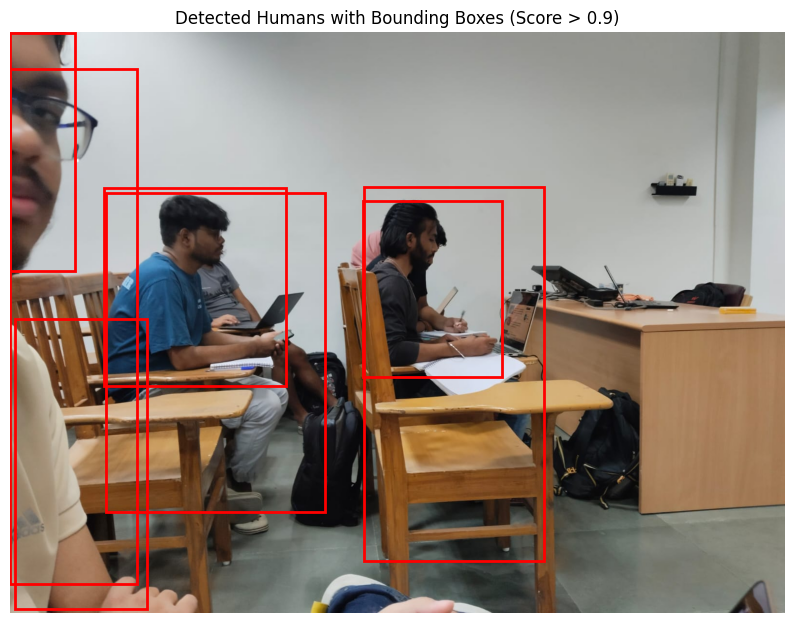

In [16]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Image preprocessing
transform = T.Compose([
    T.ToTensor(),
])

# Load the image
image_path = r"C:\Users\sambi\Downloads\test2.jpg"
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Pass the image through the model
with torch.no_grad():
    predictions = model(input_tensor)

# Get bounding boxes, labels and scores
boxes = predictions[0]['boxes'].numpy()  # Bounding boxes
labels = predictions[0]['labels'].numpy()  # Object labels
scores = predictions[0]['scores'].numpy()  # Detection scores

# Filter for humans (label 1 corresponds to 'person' in COCO dataset)
human_boxes = boxes[labels == 1]
human_scores = scores[labels == 1]

# Set a threshold for scores above 0.9
threshold = 0.75
filtered_boxes = human_boxes[human_scores > threshold]

# Convert to int for bounding box coordinates
filtered_boxes = filtered_boxes.astype(int)

# Plot the original image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(image)
ax = plt.gca()

for box in filtered_boxes:
    x1, y1, x2, y2 = box
    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='red', linewidth=2)
    ax.add_patch(rect)

plt.axis("off")
plt.title("Detected Humans with Bounding Boxes (Score > 0.9)")
plt.show()


In [ ]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the pretrained Faster R-CNN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Image preprocessing
transform = T.Compose([
    T.ToTensor(),
])

# Start webcam video capture
cap = cv2.VideoCapture(0)  # 0 for the default webcam

# Set a threshold for scores above 0.9
threshold = 0.9

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert BGR (OpenCV) to RGB (PIL)
    image_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Prepare the image for the model
    input_tensor = transform(image_rgb).unsqueeze(0)  # Add batch dimension

    # Pass the image through the model
    with torch.no_grad():
        predictions = model(input_tensor)

    # Get bounding boxes, labels and scores
    boxes = predictions[0]['boxes'].numpy()  # Bounding boxes
    labels = predictions[0]['labels'].numpy()  # Object labels
    scores = predictions[0]['scores'].numpy()  # Detection scores

    # Filter for humans (label 1 corresponds to 'person' in COCO dataset)
    human_boxes = boxes[labels == 1]
    human_scores = scores[labels == 1]

    # Filter based on score threshold
    filtered_boxes = human_boxes[human_scores > threshold]
    filtered_boxes = filtered_boxes.astype(int)

    # Draw bounding boxes on the frame
    for box in filtered_boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue color in BGR

    # Display the resulting frame
    cv2.imshow('Real-Time Human Detection', frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the capture and destroy windows
cap.release()
cv2.destroyAllWindows()

C:\Users\sambi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\sambi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


RuntimeError: shape '[14, 14]' is invalid for input of size 999